In [ ]:
# The advantages of support vector machines are:

# Effective in high dimensional spaces.
# Still effective in cases where number of dimensions is greater than the number of samples.
# Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
# Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
# The disadvantages of support vector machines include:

# If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
# SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [38]:
print(__doc__)

Automatically created module for IPython interactive environment


In [1]:
from sklearn import svm

In [2]:
X=[[0,0],[1,1]]
y=[0,1]

In [3]:
clf=svm.SVC()

In [4]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.predict([[2,2]])

array([1])

In [7]:
clf.predict([[2,2],[3,3]])

array([1, 1])

In [8]:
clf.predict([[1,-1]])

array([0])

In [9]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [10]:
clf.support_

array([0, 1])

In [12]:
clf.n_support_

array([1, 1])

In [ ]:
#下面是不同分类器的分类效果比较

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [29]:
def make_meshgrid(x,y,h=0.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
               np.arange(y_min,y_max,h))
    return xx,yy

In [38]:
#开始说明ravel以及np.c_的作用
a=[1,2]
b=[3,4,5]

In [39]:
aa,bb=np.meshgrid(a,b)

In [40]:
aa,bb

(array([[1, 2],
        [1, 2],
        [1, 2]]), array([[3, 3],
        [4, 4],
        [5, 5]]))

In [46]:
aa.ravel()

array([1, 2, 1, 2, 1, 2])

In [47]:
bb.ravel()

array([3, 3, 4, 4, 5, 5])

In [42]:
m=np.c_[aa.ravel(),bb.ravel()]
m
#说明ravel及np.c_作用结束

array([[1, 3],
       [2, 3],
       [1, 4],
       [2, 4],
       [1, 5],
       [2, 5]])

In [5]:
def plot_contours(ax,clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=Z.reshape(xx.shape())
    out=ax.contoursf(xx,yy,z,**params)
    return out

In [6]:
iris=datasets.load_iris()

In [52]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [53]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X=iris.data[:,:2]
y=iris.target

In [8]:
C=1.0

In [132]:
models=(svm.SVC(kernel='linear',C=C),
       svm.LinearSVC(C=C),
       svm.SVC(kernel='rbf',gamma=0.7,C=C),
       svm.SVC(kernel='poly',degree=3,C=C))

In [127]:
type(models)

tuple

In [130]:
models=(clf.fit(X,y) for clf in models)

In [131]:
type(models)

generator

In [67]:
titles=('SVC with linear kernel',
        'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel')

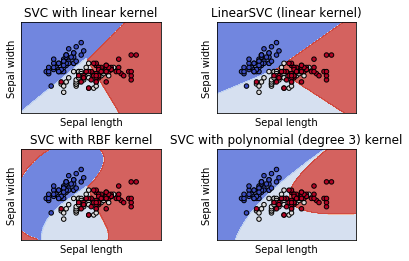

In [68]:
fig,sub=plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
x0,x1=X[:,0],X[:,1]
xx,yy=make_meshgrid(x0,x1)
for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,
                 cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(x0,x1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [173]:
a=np.arange(0,2*np.pi,0.1)

In [174]:
b=np.arange(0,2*np.pi,0.1)

In [175]:
aa,bb=np.meshgrid(a,b)

In [176]:
z=np.sin(aa.ravel())+np.sin(bb.ravel())

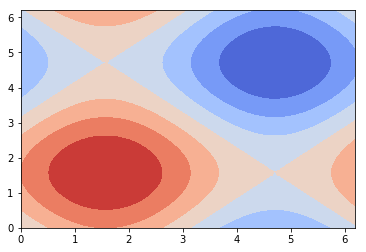

In [177]:
fig,ax=plt.subplots(1,1)
ax.contourf(aa,bb,z.reshape(aa.shape),cmap=plt.cm.coolwarm,)

In [253]:
z=(np.sin(aa.ravel())+np.sin(bb.ravel()),
  np.sin(aa.ravel())+np.cos(bb.ravel()),
  np.cos(aa.ravel())+np.sin(bb.ravel()),
  np.cos(aa.ravel())+np.cos(bb.ravel()))

In [254]:
titles=('sinx+sinx',
       'sinx+cosx',
       'cosx+sinx',
       'cosx+cosx')

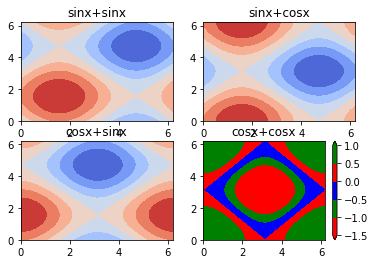

In [255]:
fig,axs=plt.subplots(2,2)
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
for z,title,ax in zip(z,titles,axs.flatten()):
    ax.contourf(aa,bb,z.reshape(aa.shape),cmap=plt.cm.coolwarm)
    ax.set_title(title)
CS3 = plt.contourf(aa, bb, z.reshape(aa.shape), levels,
               colors=('r', 'g', 'b'),
              # origin=origin,
               extend='both')    
plt.colorbar(CS3)
plt.show()
    